# Logistic Regression 

In the assignment, you will use gradient ascent to find the weights for the logistic regression.   

As an example, we will use the widely-used breast cancer data set.  This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin


## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [1]:
# Importing important libraries
# Import breastcancer dataset
# Import preprocessing from sklearn
# Import train_test_split from sklearn
# Import numpy,math

import sklearn
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix



### Importing the dataset

In [2]:
# Load dataset to a python variable cancer
# Store target to a variable called y
# Store feature to a variable called X

breastData = load_breast_cancer()

x = breastData.data
y = breastData.target


In [3]:
# Printing the shape of data (X) and target (Y) values 

print(x.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [4]:
# Use train_test_split() function to split the dataset
# Store the return value of pervious step to X_train, X_test, y_train, y_test

xTrain, xTest, yTrain, yTest = train_test_split(x, y)

#### Scale the data since we will be using gradient ascent

In [5]:
# Find the scaler of the dataset by using preprocessing.StandardScaler().fit()
# Using this scale to scale the X_train and X_test using .transform()

scaleVal = preprocessing.StandardScaler().fit(x)
xTrain = scaleVal.transform(xTrain)
xTest = scaleVal.transform(xTest)



In [6]:
# TODO - Print the shape of x_train and y_train 

print(xTrain.shape) # It should print (426, 30)
print(yTrain.shape) # It should print (426,)


(426, 30)
(426,)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

In [7]:
# Append a column of ones to x_train 
# Create a column vector of ones by using np.ones and reshape
# Append a column of ones in the beginning of x_train by using np.hstack

rowOnes = np.ones(len(xTrain))
colOnes = rowOnes.reshape(-1,1)

xTrain = np.hstack((colOnes, xTrain))

# Now do the same for the test data

rowOnes = np.ones(len(xTest))
colOnes = rowOnes.reshape(-1,1)

xTest = np.hstack((colOnes, xTest))


# We can check that everything worked correctly by printing out the new dimensions:

print("The trainng data has dimensions: ", xTrain.shape, ". The testing data has dimensions: ",xTest.shape)

# Looking at the first two rows of X_train to check everything worked as expected

print(xTrain)
print(xTest[0:2])


The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -1.12392703 -1.02615481 ... -1.35236887  1.06165929
  -0.20757752]
 [ 1.         -1.24662117 -1.70333134 ... -1.74506282  0.33042245
  -0.1349828 ]
 [ 1.         -0.13839777 -0.85860597 ... -0.34086601 -0.5998014
  -1.04435637]
 ...
 [ 1.          1.54012613  2.20614143 ...  1.21041973 -0.13388059
   0.91736357]
 [ 1.         -0.18384004  0.35612307 ...  1.69310287 -0.15167617
   1.28310797]
 [ 1.          0.16549742  0.53530723 ...  1.04749514  1.28976635
   1.41056435]]
[[ 1.         -0.33436757 -0.76086916 -0.36366965 -0.4015563   0.29460492
  -0.4721     -0.34211437 -0.39256238 -0.297985    0.2696836  -0.70658247
  -0.82235759 -0.80940437 -0.49871449  0.56136312 -0.30449397 -0.2832842
  -0.07723404  0.69107992  0.35218836 -0.52375102 -0.93589962 -0.54958484
  -0.51890617  0.69836738 -0.301944   -0.23070563 -0.13713413  0.77531212
   0.65912586]
 [ 1.         -0.91659667 -1.472951

### Understanding the dataset

In [8]:
# Printing the names of all the features

print(breastData.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# You can add your own code here to better understand the dataset


 Before writing the gradient ascent code, first write some helpful functions


 
### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [10]:
# Write the sigmoid function

def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))


### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ to any values.)

In [11]:
# Initialize w using np.zeros()

wCoefficients = np.zeros((xTrain.shape[1],1))

### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [12]:
# Predict the probability that a patient has cancer 
# Write the hypothesis function 
def hypothesis(xTrain, wCoefficients): #xTrain??

    return sigmoid(np.dot(xTrain,wCoefficients)) 



### Log-Likelihood Function.
Write the code to calculate the log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [13]:
# Write the log likelihood function 
def log_likelihood(xTrain , yTrain , wCoefficients ): #xTrain?? yTrain??
    m = xTrain.shape[0]
    hX = hypothesis(xTrain,wCoefficients)
    logL = (1/m) * np.sum(yTrain * np.log(hX)+(1-yTrain)*np.log(1-hX))

    return logL


# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [14]:
# TODO - Write the gradient ascent function 
def logisticRegressionGradientAscent(xTrain, yTrain, learnRate, numIterations):
    # For every 100 iterations, store the log_likelihood for the current w
    # Initializing log_likelihood to be an empty list  
    # Initialize w to be a zero vector of shape x_train.shape[1],1
    # Initialize N to the number of training examples
    
    yTrain = yTrain.reshape(yTrain.shape[0], 1)
    logLikelihoodValues = []
    wCoefficients = np.zeros((xTrain.shape[1],1))
    N = xTrain.shape[0]
    
    for i in range(numIterations):
        hX = hypothesis(xTrain,wCoefficients)
        gradient = (1/N) * np.dot(xTrain.T, hX-yTrain)
        wCoefficients =  wCoefficients - (learnRate*gradient)

        if (i%100 == 0):
            logLikelihoodValues.append(log_likelihood(xTrain , yTrain , wCoefficients) )


    return wCoefficients, logLikelihoodValues

### After completing the code above, run the following

In [15]:
# Set the learning_rate
learnRate = 0.5 
# Set the num_iters
numIterations = 5000
# Run the Logistic_Regresion_Gradient_Ascent() and store the returned values
wCoefficient, logLikelihoodValue = logisticRegressionGradientAscent(xTrain, yTrain, learnRate, numIterations)
print("wCoefficients",wCoefficient)
print("Log Likelihood Values",logLikelihoodValue)

wCoefficients [[-0.6941233 ]
 [ 0.16140642]
 [ 0.20834556]
 [ 0.28733743]
 [-0.16262661]
 [-0.34364002]
 [ 3.3879749 ]
 [-2.35039744]
 [-2.6810812 ]
 [ 1.21778171]
 [ 0.25294747]
 [-4.11587187]
 [ 0.38846146]
 [-1.59663056]
 [-2.61265856]
 [ 0.41368688]
 [ 1.28026885]
 [-0.96950496]
 [-1.21782745]
 [ 0.26931051]
 [ 1.15406252]
 [-1.42666293]
 [-3.10371887]
 [-1.06854143]
 [-1.57831195]
 [-1.42300936]
 [ 1.01679151]
 [-2.20054986]
 [-1.37958673]
 [-2.56130243]
 [-0.45013478]]
Log Likelihood Values [-0.22384709162123043, -0.06125042707832265, -0.052883345046471165, -0.04893197156991956, -0.04640511169087769, -0.04454293141363669, -0.04305529344330106, -0.04180627980192731, -0.04072311178954044, -0.03976280846709119, -0.038897963955739225, -0.038109983729356776, -0.037385592339836266, -0.036714908025373305, -0.03609032133815499, -0.03550581005075451, -0.03495650218469742, -0.03443838607041652, -0.03394811085033023, -0.03348284459994891, -0.03304017040410936, -0.0326180082482667, -0.032214

# Plotting Likelihood v/s Number of Iterations.

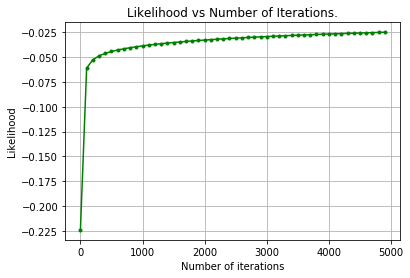

In [16]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,numIterations,100))
plt.plot(iters,logLikelihoodValue,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

#  Evaluating your model

In [17]:
# use hypothesis(...) to predict.

yPred = hypothesis(xTest,wCoefficient)


In [18]:
TP=0
FP=0
FN=0
TN=0

for i in range(yTest.shape[0]):
    if yTest[i] == 0:
        if yPred[i] < 0.5: TN+=1
        else: FP+=1
    else:
        if yPred[i] >= 0.5: TP += 1
        else: FN += 1

recallVal = TP/(TP+FN)
precisionVal = TP/(TP+FP)
fOneVal = (2*precisionVal*recallVal)/(precisionVal + recallVal)

print("Precision: ",precisionVal)
print("Recall: ",recallVal)
print("F1: ",fOneVal)
print("Confusion Matrix: ")
print("TP: ",TP," FN: ",FN," FP: ",FP," TN: ",TN)


Precision:  0.9578947368421052
Recall:  0.9578947368421052
F1:  0.9578947368421052
Confusion Matrix: 
TP:  91  FN:  4  FP:  4  TN:  44
